In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import pickle
from scipy.stats import gaussian_kde

import os

output_path = f'/Users/fnoic/Library/CloudStorage/Dropbox/Apps/Overleaf/PC2MODEL_2024_Noichl/'

In [77]:
path = '/Users/fnoic/Downloads/combo.txt'
with open(path, 'r') as f:
    # load txt with pandas, first row is header
    data_loaded = pd.read_csv(f, sep=' ', header=0)
    
# rename column 1 to X
data_loaded.rename(columns={'//X': 'X'}, inplace=True)
# drop Original_cloud_index
data_loaded.drop(columns=['Original_cloud_index'], inplace=True)
# remove duplicates
print(data_loaded.shape)
data_loaded.drop_duplicates(inplace=True)
print(data_loaded.shape)
data_loaded.head()

(1003098, 6)
(501549, 6)


,X,Y,Z,Scalar_field,Number_of_neighbors_(r=0.1),Volume_density_(r=0.1)
0,-0.5750,24.8440,6.9004,1.0,14.0,3342.253662
1,-0.5833,24.8451,6.9006,1.0,12.0,2864.788818
2,-0.6158,24.8449,6.8999,1.0,10.0,2387.323975
3,-0.6577,24.8423,6.8998,1.0,7.0,1671.126831
4,-0.6728,24.8519,6.8994,1.0,7.0,1671.126831


In [78]:
# identify unique values in column Scalar_field
inst_ids = data_loaded['Scalar_field'].unique()
eval = pd.DataFrame(columns=['id', 'mean', 'std', 'median', 'num_points'])
for inst_id in inst_ids:
    data = data_loaded[data_loaded['Scalar_field'] == inst_id]
    nn_mean = data['Number_of_neighbors_(r=0.1)'].mean()
    nn_std = data['Number_of_neighbors_(r=0.1)'].std()
    nn_median = data['Number_of_neighbors_(r=0.1)'].median()
    num_points = len(data)
    # write to eval, not append
    eval.loc[len(eval)] = [inst_id, nn_mean, nn_std, nn_median, num_points]
    # print(f'Instance {inst_id} has mean {nn_mean}, std {nn_std}, median {nn_median}')

In [79]:
# smallest number of points
print('smallest number of points: ', eval[eval['num_points'] == eval['num_points'].min()][['id', 'num_points']])
# largest number of points
print('largest number of points: ', eval[eval['num_points'] == eval['num_points'].max()][['id', 'num_points']])
# smallest mean
print('smallest mean: ', eval[eval['mean'] == eval['mean'].min()][['id', 'mean']])
# largest mean
print('largest mean: ', eval[eval['mean'] == eval['mean'].max()][['id', 'mean']])
# smallest std
print('smallest std: ', eval[eval['std'] == eval['std'].min()][['id', 'std']])
# largest std
print('largest std: ', eval[eval['std'] == eval['std'].max()][['id', 'std']])

smallest number of points:        id  num_points
16  17.0      1213.0
largest number of points:      id  num_points
8  9.0     58232.0
smallest mean:        id        mean
15  16.0  123.838146
largest mean:      id        mean
3  4.0  479.796593
smallest std:        id        std
17  18.0  52.111382
largest std:        id         std
10  11.0  219.695172


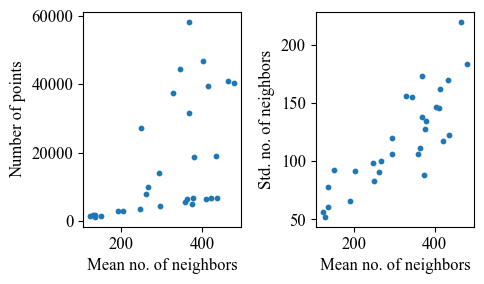

In [80]:
# make the two scatter plots in one, as subplots next to each other
fig, axs = plt.subplots(1, 2)
axs[0].scatter(eval['mean'], eval['num_points'], s=10)
axs[0].set_xlabel('Mean no. of neighbors')
axs[0].set_ylabel('Number of points')
axs[1].scatter(eval['mean'], eval['std'], s=10)
axs[1].set_xlabel('Mean no. of neighbors')
axs[1].set_ylabel('Std. no. of neighbors')
# change size of figure
fig.set_size_inches(5, 3)
# increase space between subplots
plt.tight_layout()
# to pdf
plt.savefig('scatter_mean_num_points_std.pdf')
plt.show()

## load cloud for visualization

In [81]:
cloudpath = '/Users/fnoic/PycharmProjects/reconstruct/data/parking/cache_cloud_2.pickle'
with (open(cloudpath, 'rb') as f):
    cloud = pickle.load(f)
# Set font to Times New Roman for all text
rcParams['font.family'] = 'Times New Roman'
rcParams['font.sans-serif'] = ['Times New Roman']
rcParams['font.size'] = 12
# set times new roman for math font as well
rcParams['mathtext.fontset'] = 'cm'



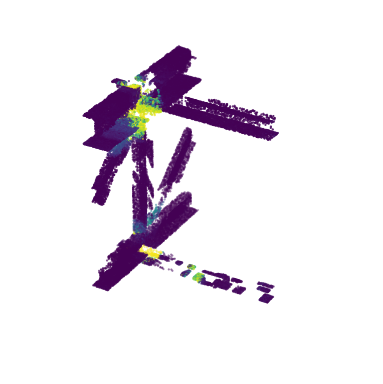

In [82]:
# plot cloud with colors for confidence
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(cloud['x'], cloud['y'], cloud['z'], s=0.3, c=cloud['supernormal_dev_gt'], cmap='viridis')

elev, azim = ax.elev, ax.azim

# no grid
ax.grid(False)
# no axes
ax.axis('off')

# Set equal aspect ratio
x = cloud['x']
y = cloud['y']
z = cloud['z']
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.savefig(f'{output_path}supernormal_gt_deviation.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{output_path}supernormal_gt_deviation.png', bbox_inches='tight', dpi=300)
plt.show()

In [83]:
print(f'elevation: {elev}, azimuth: {azim}')

elevation: 30, azimuth: -60


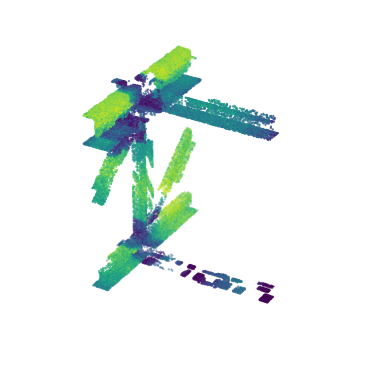

In [84]:
### PLOT cloud with colors for supernormal deviation
# plot cloud with confidence colors
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(cloud['x'], cloud['y'], cloud['z'], s=0.3, c=cloud['confidence'], cmap='viridis')

# no grid
ax.grid(False)
# no axes
ax.axis('off')

# Set equal aspect ratio
x = cloud['x']
y = cloud['y']
z = cloud['z']
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))


# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.savefig(f'{output_path}confidence.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{output_path}confidence.png', bbox_inches='tight', dpi=300)
plt.show()

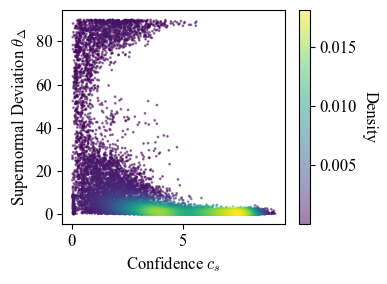

Mean value of deviation:  7.579577681251813
Median value of deviation:  0.844126178731301


In [85]:
# plot scatter plot of confidence vs supernormal deviation
x = cloud['confidence']
y = cloud['supernormal_dev_gt']
x = np.array(x, dtype=np.float64)
y = np.array(y, dtype=np.float64)

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(4, 3))

# Scatter plot with color representing density
scatter = ax.scatter(x, y, c=z, cmap='viridis', s=1, alpha=0.5)

# Set y-axis to logarithmic scale
# ax.set_yscale('log')

# Label axes with LaTeX math notation
ax.set_xlabel(r'Confidence $c_s$')
ax.set_ylabel(r'Supernormal Deviation $\theta_\Delta$')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Density', rotation=270, labelpad=15)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.savefig(f'{output_path}confidence_vs_supernormal_deviation.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{output_path}confidence_vs_supernormal_deviation.png', bbox_inches='tight', dpi=300)
plt.show()

# print mean value of deviation
print('Mean value of deviation: ', np.mean(y))
# median
print('Median value of deviation: ', np.median(y))


### planar patches

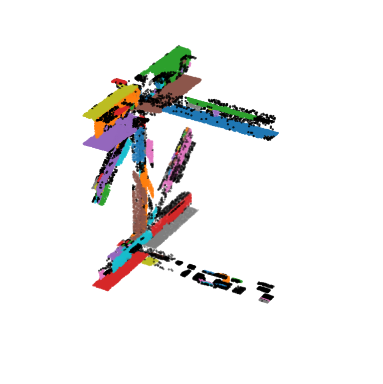

In [86]:
# plot cloud with colors from ransac_patch
pth = '/Users/fnoic/PycharmProjects/reconstruct/data/parking/cache_cloud_1.pickle'
with (open(pth, 'rb')) as f:
    cloud2 = pickle.load(f)

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab10(np.mod(cloud2['ransac_patch'], 10))
# where ransac_patch is 0 set color to black
colors[cloud2['ransac_patch'] == 0] = [0, 0, 0, 1]

# Create the scatter plot
scatter = ax.scatter(cloud2['x'], cloud2['y'], cloud2['z'], s=0.3, c=colors)

plt.tight_layout()

# no grid
ax.grid(False)
# no axes
ax.axis('off')

# Set equal aspect ratio
x = cloud2['x']
y = cloud2['y']
z = cloud2['z']
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))


# Adjust layout to prevent cutting off labels


plt.savefig(f'{output_path}ransac_patch.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{output_path}ransac_patch.png', bbox_inches='tight', dpi=300)
plt.show()


Index(['x', 'y', 'z', 'instance_gt', 'nx', 'ny', 'nz', 'id', 'rnx', 'rny',
       'rnz', 'ransac_patch', 'snx', 'sny', 'snz', 'confidence',
       'supernormal_dev_gt', 'instance_pr'],
      dtype='object')


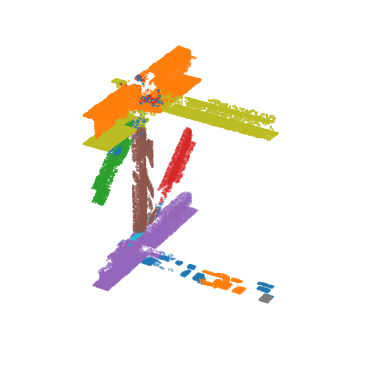

In [88]:
# plot cloud with instance prediction as colors
pth = '/Users/fnoic/PycharmProjects/reconstruct/data/parking/cache_cloud_3.pickle'
with open(pth, 'rb') as f:
    cloud3 = pickle.load(f)

# print column heads
print(cloud3.columns)

fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab10(np.mod(cloud3['instance_pr'], 10))

# Create the scatter plot
scatter = ax.scatter(cloud3['x'], cloud3['y'], cloud3['z'], s=0.3, c=colors)

plt.tight_layout()

# Set equal aspect ratio
x = cloud3['x']
y = cloud3['y']
z = cloud3['z']
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))

    
# no grid
ax.grid(False)

# no axes
ax.axis('off')

plt.savefig(f'{output_path}instance_prediction.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{output_path}instance_prediction.png', bbox_inches='tight', dpi=300)
plt.show()



In [97]:
pth = '/Users/fnoic/PycharmProjects/reconstruct/experiment_log/'
# iterate over files in pth
for log_file in os.listdir(pth):
    if log_file.endswith('.txt'):
        with open(pth + log_file, 'r') as f:
            lines = f.readlines()
            # split every line by spaces
            lines = [line.split() for line in lines]
            # every second line has data
            data = [line for line in lines[1::2]]
            # every first line has header
            
            
            

In [98]:
data

[['New',
  'best',
  'for',
  'swarm',
  'at',
  'iteration',
  '1:',
  '[-6.18046793e-01',
  '-1.87665264e+01',
  '1.52729004e-02',
  '1.15167368e-02'],
 ['New',
  'best',
  'for',
  'swarm',
  'at',
  'iteration',
  '1:',
  '[-6.16007826e-01',
  '-1.87630941e+01',
  '9.70200218e-03',
  '8.28385519e-03'],
 ['New',
  'best',
  'for',
  'swarm',
  'at',
  'iteration',
  '1:',
  '[-6.21703205e-01',
  '-1.87636778e+01',
  '1.13876832e-02',
  '5.00000000e-03'],
 ['Best',
  'after',
  'iteration',
  '1:',
  '[-6.21703205e-01',
  '-1.87636778e+01',
  '1.13876832e-02',
  '5.00000000e-03'],
 ['New',
  'best',
  'for',
  'swarm',
  'at',
  'iteration',
  '2:',
  '[-6.22090229e-01',
  '-1.87645066e+01',
  '1.50787551e-02',
  '5.00000000e-03'],
 ['Best',
  'after',
  'iteration',
  '2:',
  '[-6.22090229e-01',
  '-1.87645066e+01',
  '1.50787551e-02',
  '5.00000000e-03'],
 ['New',
  'best',
  'for',
  'swarm',
  'at',
  'iteration',
  '3:',
  '[-6.18134935e-01',
  '-1.87653016e+01',
  '1.53293806e-